In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pickle 
import os

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Car-Price-Prediction/car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df['no_year']=2020-df['Year']

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [7]:
df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [8]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [9]:
df=pd.get_dummies(df)

In [10]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1


In [11]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [12]:
x.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,0,6,0,0,1,1,0,0,1
1,9.54,43000,0,7,0,1,0,1,0,0,1
2,9.85,6900,0,3,0,0,1,1,0,0,1
3,4.15,5200,0,9,0,0,1,1,0,0,1
4,6.87,42450,0,6,0,1,0,1,0,0,1


In [13]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=5)

In [15]:
x_train.shape , y_train.shape

((225, 11), (225,))

**Linear Regression**

In [16]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
prediction = lr.predict(x_test)

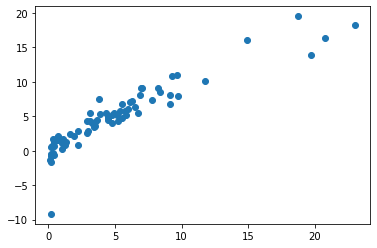

In [18]:
plt.scatter(y_test,prediction)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


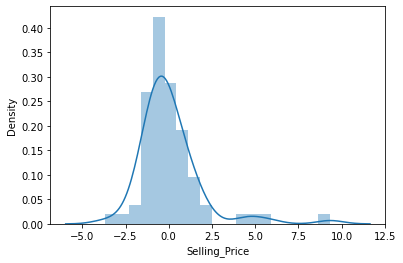

In [19]:
sns.distplot(y_test-prediction)

In [20]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.140996108785903
MSE:  3.281596341657541
RMSE:  1.8115176901309964
R squared:  0.8608525898499427


**Ridge Regression**

In [21]:
ridge=Ridge()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)

In [22]:
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1332339163458562
MSE:  3.273826643652637
RMSE:  1.8093718920256934
R squared:  0.8611820433361336


**Lasso Regression**

In [23]:
ridge=Lasso()
ridge.fit(x_train,y_train)
prediction = ridge.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.3349151159008386
MSE:  4.473136814451777
RMSE:  2.114979152249917
R squared:  0.8103284687770422


In [24]:
r=Ridge()
parameters={'alpha':[1,20]}
l=RandomizedSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1187640189415795
MSE:  3.2349381933942585
RMSE:  1.7985933930141795
R squared:  0.8628310051750749


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [25]:
r=Ridge()
parameters={'alpha':[1000,100,30,40,50]}
l=GridSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
l.fit(x_train,y_train)
prediction = l.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  1.1194605545945522
MSE:  3.2351172727768667
RMSE:  1.7986431755011516
R squared:  0.8628234117876784


In [26]:
l.best_params_

{'alpha': 30}

In [27]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

**K Nearest Neighbor (KNN)**

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error

In [29]:

rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.6368279153588166
RMSE value for k=  2 is: 5.188258251495441
RMSE value for k=  3 is: 4.906314853186299
RMSE value for k=  4 is: 4.856947673924112
RMSE value for k=  5 is: 4.873718444235799
RMSE value for k=  6 is: 4.7612642139671975
RMSE value for k=  7 is: 4.634825884843375
RMSE value for k=  8 is: 4.843032977489687
RMSE value for k=  9 is: 4.734429423099809
RMSE value for k=  10 is: 4.7163170231821665
RMSE value for k=  11 is: 4.703221629150593
RMSE value for k=  12 is: 4.698801275294328
RMSE value for k=  13 is: 4.712458439472527
RMSE value for k=  14 is: 4.74525571766091
RMSE value for k=  15 is: 4.7319152286356685


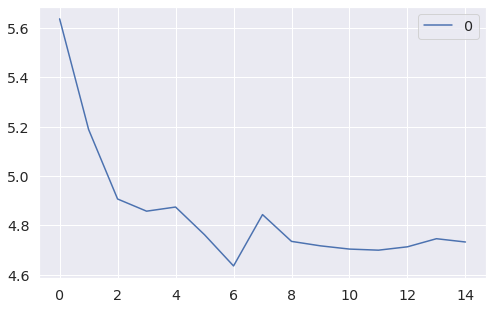

In [30]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

In [31]:

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(x_train.astype('int'), y_train.astype('int'))

#Predict the response for test dataset
y_pred = knn.predict(x_test.astype('int'))

In [32]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test.astype('int'), y_pred.astype('int')))


Accuracy: 0.18421052631578946


In [33]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
accuracy = knn.score(x_test.astype('int'),y_test.astype('int'))
print("Accuracy:", round(accuracy*100,3),'%')

Mean Absolute Error: 3.77
Mean Squared Error: 34.09
Root Mean Squared Error: 5.84
Accuracy: 18.421 %


**Random Forest**


In [34]:
r=RandomForestRegressor(n_estimators=100)
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)
prediction = rf_random.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.8min finished


MAE:  0.5699778947368452
MSE:  1.0810880907973708
RMSE:  1.0397538606792334
R squared:  0.9541593199416656


In [35]:
r=RandomForestRegressor(n_estimators=100)

r.fit(x_train,y_train)
prediction = r.predict(x_test)
print('MAE: ',metrics.mean_absolute_error(y_test,prediction))
print('MSE: ',metrics.mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print('R squared: ',metrics.r2_score(y_test,prediction))

MAE:  0.4988328947368429
MSE:  0.606964536184211
RMSE:  0.7790792874824815
R squared:  0.9742632747998786


In [36]:
pickle.dump(r,open('model.pkl','wb'))